In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from models import CustomSVM
from utils import preprocess_data, extract_features
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("sentiment140")

[nltk_data] Downloading package punkt to /Users/markmaci/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/markmaci/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/Users/markmaci/miniconda3/lib/python3.11/site-packages/datasets/load.py:1486: FutureWarning: The repository for sentiment140 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/sentiment140
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [2]:
df = pd.DataFrame(dataset['train'])

print(df.head())

# Rename 'sentiment' to 'target'
df = df.rename(columns={"sentiment": "target"})

# Drop rows with NaN values in 'target' and 'text'
df.dropna(subset=['target', 'text'], inplace=True)

# Preprocess data
df = preprocess_data(df)

# Feature extraction method: 'tfidf' or 'glove'
feature_method = 'tfidf'
glove_path = '../data/glove.840B.300d.txt'

# Extract features
X = extract_features(df, method=feature_method, glove_path=glove_path)
y = df['target'].values

# Ensure feature matrix X and target vector y are of the same length
assert len(X) == len(y), "Mismatch in lengths of X and y"

print("Feature extraction complete. Proceeding with training...")


                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                           date             user  sentiment     query  
0  Mon Apr 06 22:19:45 PDT 2009  _TheSpecialOne_          0  NO_QUERY  
1  Mon Apr 06 22:19:49 PDT 2009    scotthamilton          0  NO_QUERY  
2  Mon Apr 06 22:19:53 PDT 2009         mattycus          0  NO_QUERY  
3  Mon Apr 06 22:19:57 PDT 2009          ElleCTF          0  NO_QUERY  
4  Mon Apr 06 22:19:57 PDT 2009           Karoli          0  NO_QUERY  
Feature extraction complete. Proceeding with training...


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = CustomSVM(C=1.0, learning_rate=0.001, epochs=50, batch_size=100)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

Epoch 1/5 - Loss: 1557774.9535 - Time: 37.85 seconds
Epoch 2/5 - Loss: 4000724.9285 - Time: 36.33 seconds
Epoch 3/5 - Loss: 1427506.5882 - Time: 36.82 seconds
Epoch 4/5 - Loss: 1245722.5863 - Time: 36.52 seconds
Epoch 5/5 - Loss: 1247395.5705 - Time: 36.88 seconds


In [4]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n {report}")
print(report)

Accuracy: 0.77931875
Classification Report:
               precision    recall  f1-score   support

          -1       0.74      0.86      0.80    159494
           1       0.84      0.69      0.76    160506

    accuracy                           0.78    320000
   macro avg       0.79      0.78      0.78    320000
weighted avg       0.79      0.78      0.78    320000

              precision    recall  f1-score   support

          -1       0.74      0.86      0.80    159494
           1       0.84      0.69      0.76    160506

    accuracy                           0.78    320000
   macro avg       0.79      0.78      0.78    320000
weighted avg       0.79      0.78      0.78    320000



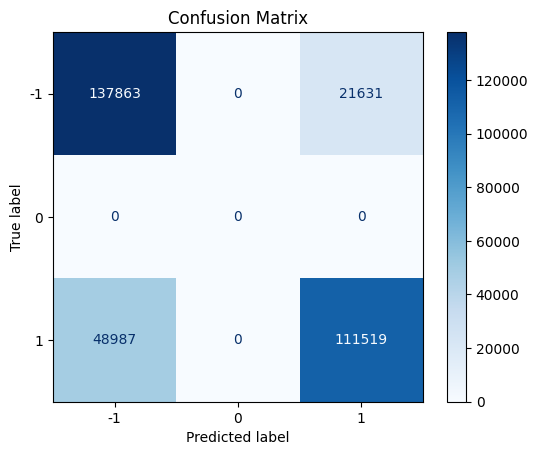

In [5]:
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()